# Load data and libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.3
✔ tibble  3.0.6     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
outbreak_clean_df <- readRDS("../data/outbreak_clean_df.RDS")

In [4]:
summary(outbreak_clean_df)

 interviewee_id  interviewer        interview_date       a_1_initials      
 Min.   : 1.00   Length:58          Min.   :2021-01-15   Length:58         
 1st Qu.:15.25   Class :character   1st Qu.:2021-01-15   Class :character  
 Median :29.50   Mode  :character   Median :2021-01-15   Mode  :character  
 Mean   :29.50                      Mean   :2021-01-15                     
 3rd Qu.:43.75                      3rd Qu.:2021-01-15                     
 Max.   :58.00                      Max.   :2021-01-15                     
                                                                           
    a_1_age                        a_2_gender a_self_identified_gender
 Min.   : 5.00   Male                   :26   Length:58               
 1st Qu.: 9.00   Female                 :32   Class :character        
 Median :29.50   Prefer to self-describe: 0   Mode  :character        
 Mean   :24.43   Prefer not to say      : 0                           
 3rd Qu.:35.00   Not recorded        

# Incubation time

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


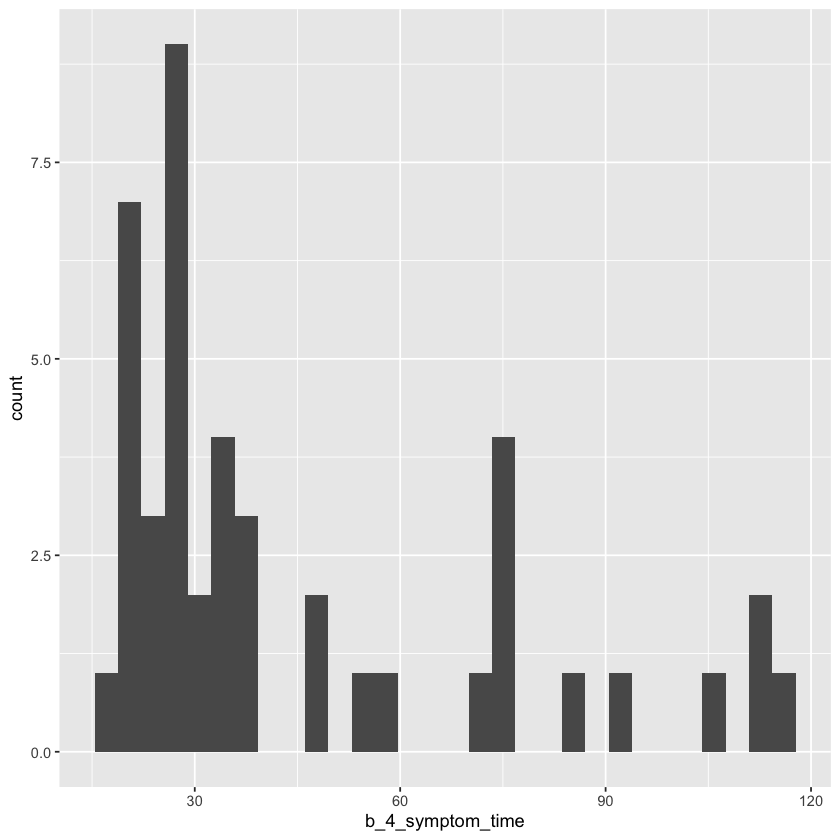

In [8]:
ggplot(outbreak_clean_df, aes(b_4_symptom_time)) +
    geom_histogram()

Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


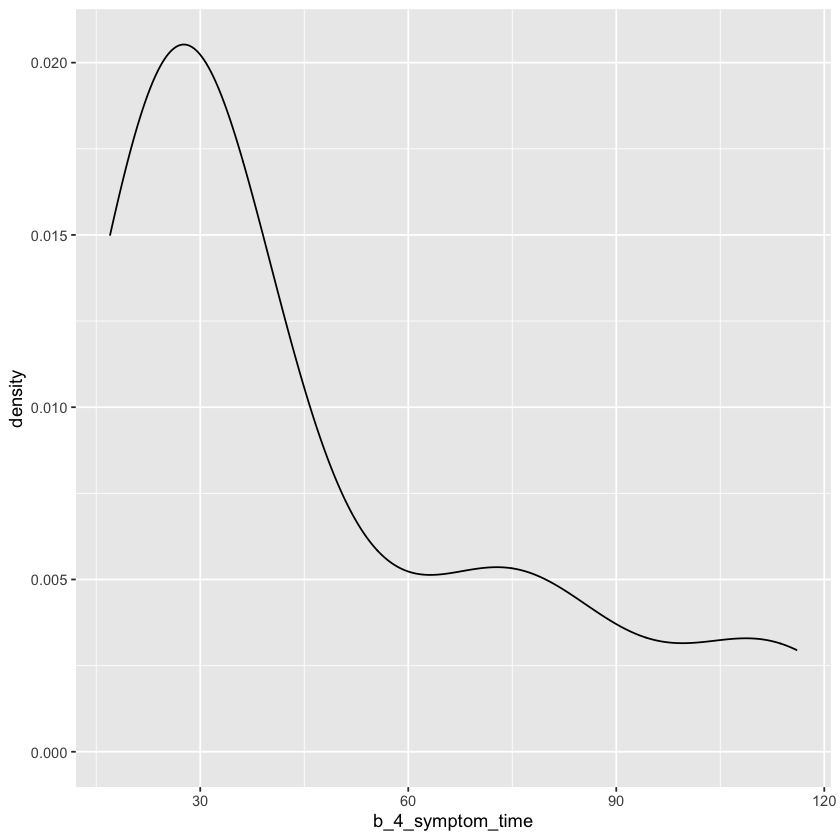

In [9]:
ggplot(outbreak_clean_df, aes(b_4_symptom_time)) +
    geom_density()

## Time to onset averages ~28 hours

# Symptom duration

Warning message:
“Removed 14 rows containing non-finite values (stat_count).”


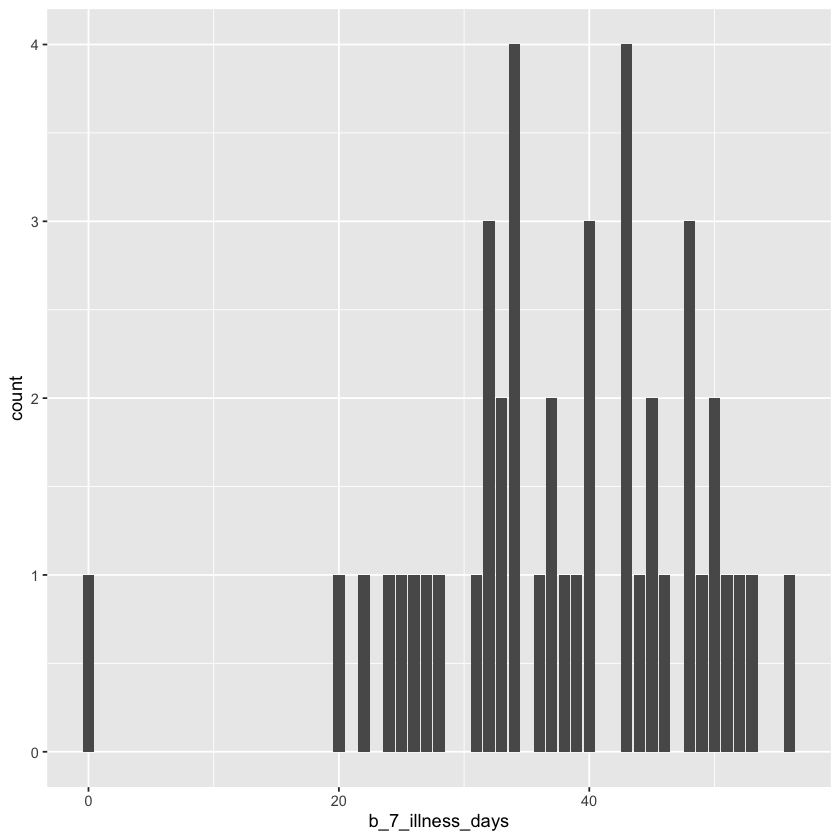

In [10]:
ggplot(outbreak_clean_df, aes(b_7_illness_days)) +
    geom_bar()

Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


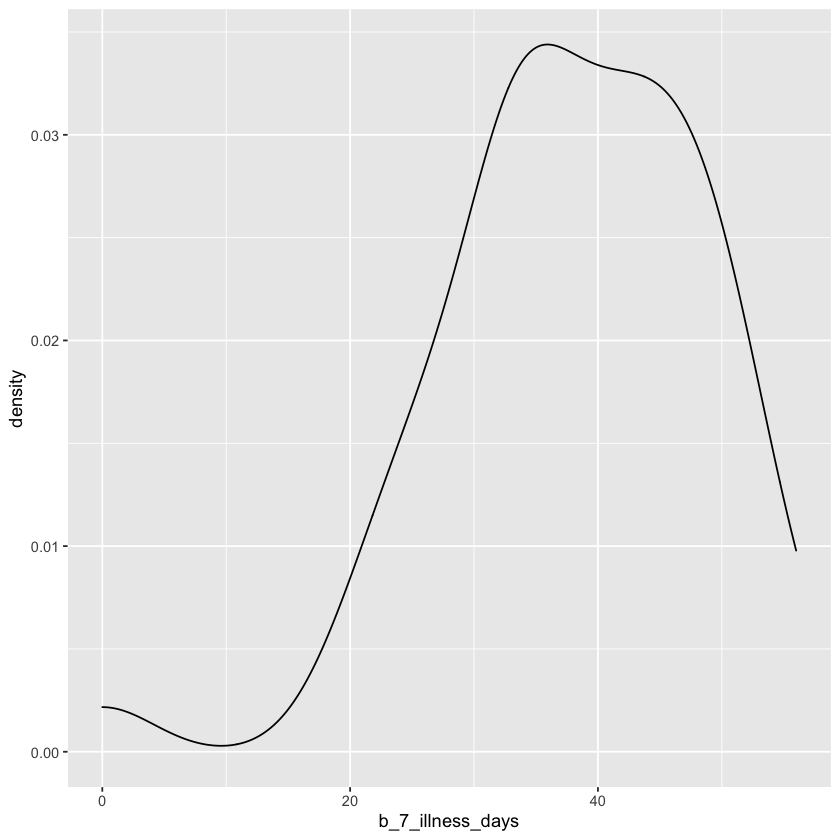

In [11]:
ggplot(outbreak_clean_df, aes(b_7_illness_days)) +
    geom_density()

## Averages about 40 hours